# Electricity Utility Data

### At start lets import the libraries we require. 
- pandas - It is used for the data manipulation. 
- numpy - It is used for any Mathematical Computaions
- matplotlib.pyplot - used to plot Graphs.
- seaborn - same as above but with more functionalities.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Importing the dataset.


### Dataset Description:
The data provided in this Github link is the fuel quality data from the Federal Energy Regulatory Commission which is provided by the United States Energy Information Administration. The data consists of the following columns:

- 'Record_id' : record id

- 'Utility_id_ferc1': Utility id assigned by the FERC

- 'Report_year': year of report

- 'Plant_name_ferc1': the name of the plant

- 'Fuel_type_code_pudl': the type of fuel

- 'Fuel_unit': the unit of fuel

- 'Fuel_qty_burned': the quantity of fuel burned

- 'Fuel_mmbtu_per_unit': the measure of energy per unit
 
- 'fuel_cost_per_unit_burned': the fuel cost per unit burned

- 'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit

- 'fuel_cost_per_mmbtu': the cost of fuel per mmbtu


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv')

In [4]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
df.shape

(29523, 11)

**This data has 29523 rows and 11 columns.**

In [6]:
df.columns  #--> This is used to print the features of dataset.

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [7]:
df.dtypes  #-->Datatypes of each an every feature.

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

### This dataset consist of 4 categorical Variables and 7 Numerical Variables.

In [8]:
df.describe() #--> It is describing the whole numerical Variables of the dataset to determine the mean, max , min,etc .
# You can view below.

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


### Print the number unique values in each an every column.

In [9]:
for column in df.columns:
    print(f"{column} has unique values: {len(df[column].unique())}")

record_id has unique values: 29523
utility_id_ferc1 has unique values: 185
report_year has unique values: 25
plant_name_ferc1 has unique values: 2315
fuel_type_code_pudl has unique values: 6
fuel_unit has unique values: 10
fuel_qty_burned has unique values: 26432
fuel_mmbtu_per_unit has unique values: 11227
fuel_cost_per_unit_burned has unique values: 19416
fuel_cost_per_unit_delivered has unique values: 16675
fuel_cost_per_mmbtu has unique values: 12605


In [10]:
df.info() #--> displaying the info  of the datset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


## Finding Missing Values

In [11]:
for null_column in df.columns:
    if df[null_column].isnull().sum()>0:
        print(f'The column {null_column} contains {df[null_column].isnull().sum()} null values.')

The column fuel_unit contains 180 null values.


**Fuel_unit is only column which has 180 null values in it.**

## Fill the missing Values.

### Mode Imputation Technique

In [12]:
# Lets observe the unique value in the feature called fuel_unit.
print("This are the unique Values in these column:\n",list(df['fuel_unit'].unique()))

This are the unique Values in these column:
 ['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu', 'mwhth', 'gal']


In [13]:
# Find the Most occurrent fuel_unit value.
most_occurent_fuel_unit = df['fuel_unit'].value_counts().sort_values(ascending=False).keys()[0]
most_occurent_fuel_unit

'mcf'

In [14]:
# so from the above experiment we got the 'mcf' has most occurence fuel_unit
# will replace nan values with MCF because this is the best approach to handle the Missing values.

df['fuel_unit']= df['fuel_unit'].fillna(most_occurent_fuel_unit)

In [15]:
# lets check is our null values are filled with the most_occurent value.

df['fuel_unit'].isnull().sum() #--> There are no missing Values as we observe the output.

0

### We have succesfully replace the null Values.

In [16]:
# to print the information of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29523 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


## Exploratory Data Analysis

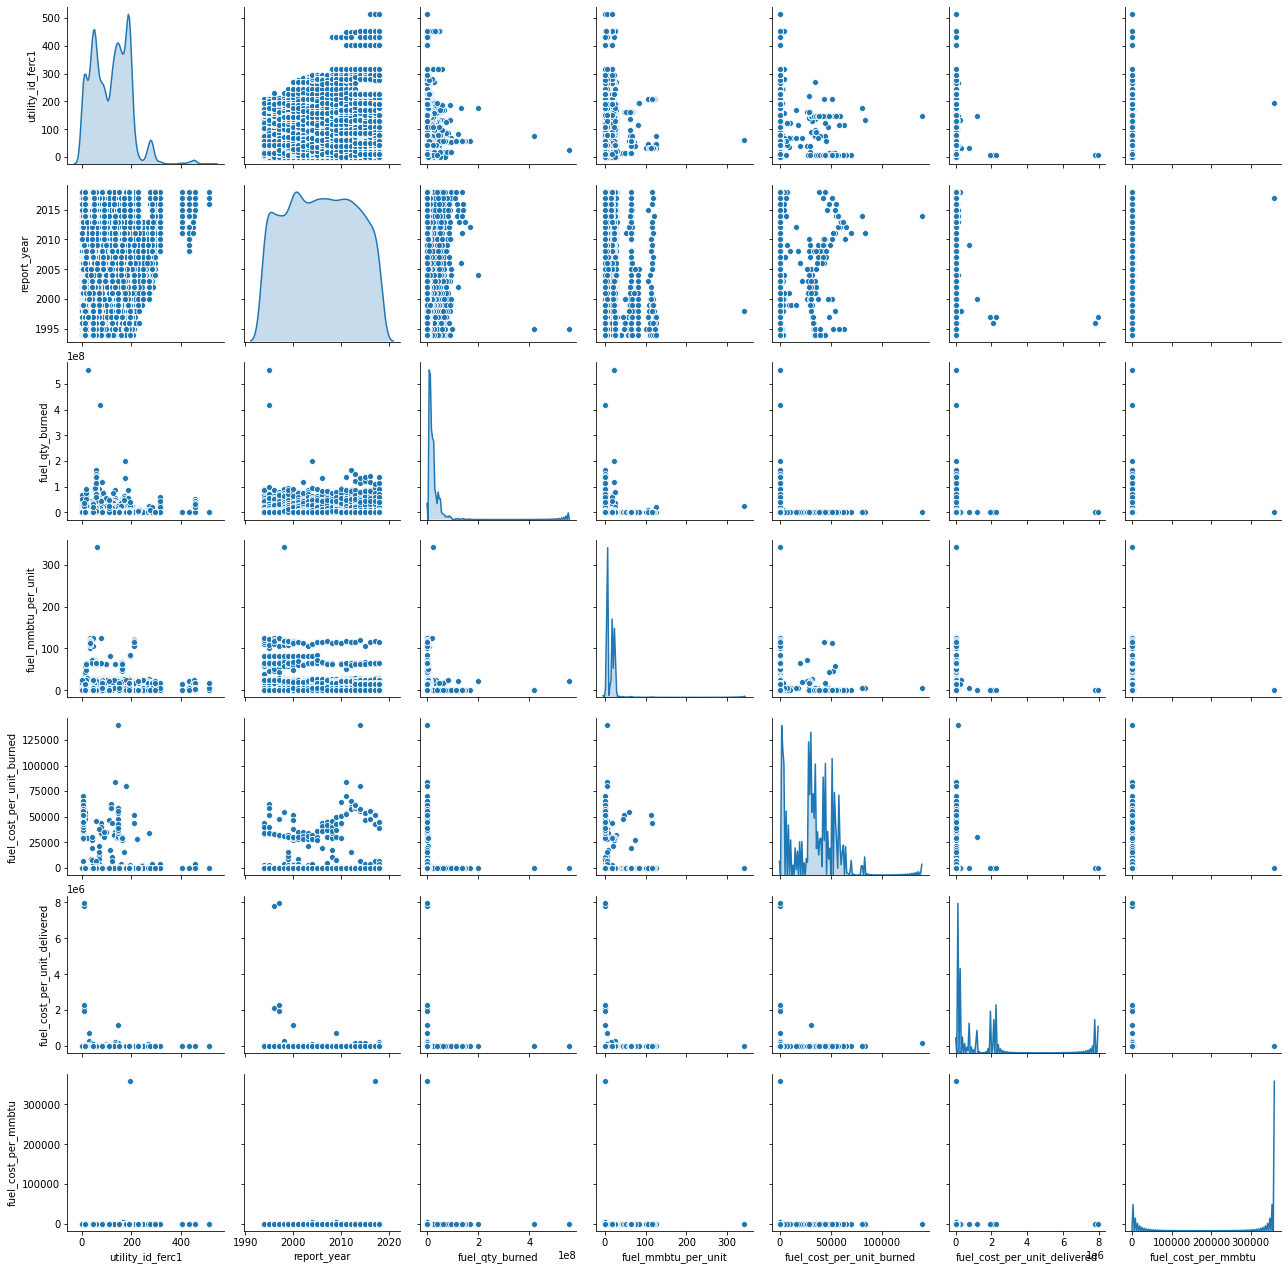

In [17]:
# lets Have EDA Now.
# EDA --> Exploratory Data Analysis.

# first we will make the Plot using Pairplot.
%matplotlib inline 

sns.pairplot(df,palette='r',diag_kind='kde')
plt.show()

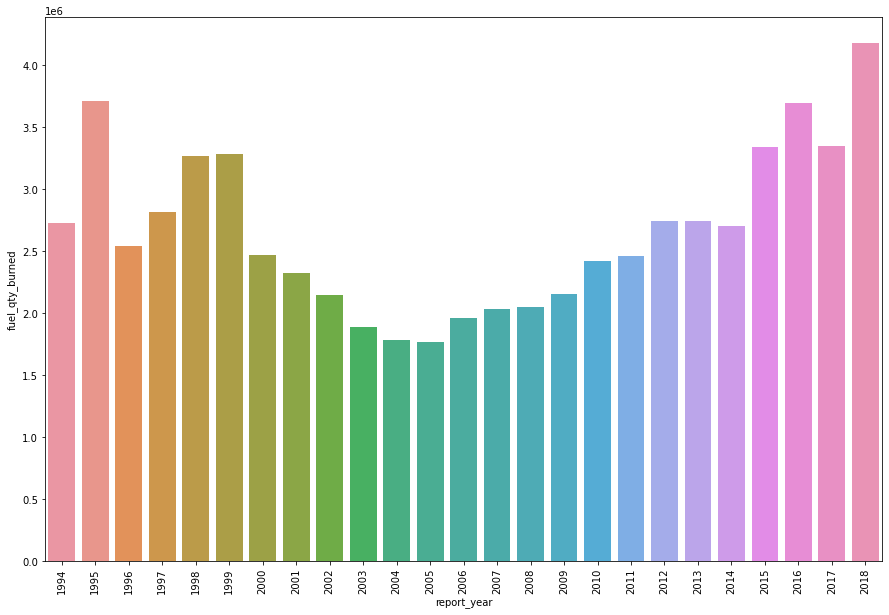

In [18]:
# In which Year More Avg fuel Quantity is burned
report_year_fuel_qty_burned = df.groupby(['report_year'])['fuel_qty_burned'].mean().sort_values(ascending =True)
df_report_year_fuel_qty_burned = pd.DataFrame(report_year_fuel_qty_burned,columns=['fuel_qty_burned'])

# Plotting Bar graph. --> report_year v\s fuel_qty_burned
plt.figure(figsize=(15,10))
sns.barplot(data=df_report_year_fuel_qty_burned, x=df_report_year_fuel_qty_burned.index, y= 'fuel_qty_burned')
plt.xticks(rotation=90)
plt.show()

### In, 2018 there more avg fuel quantity is burned as compared to all other years.

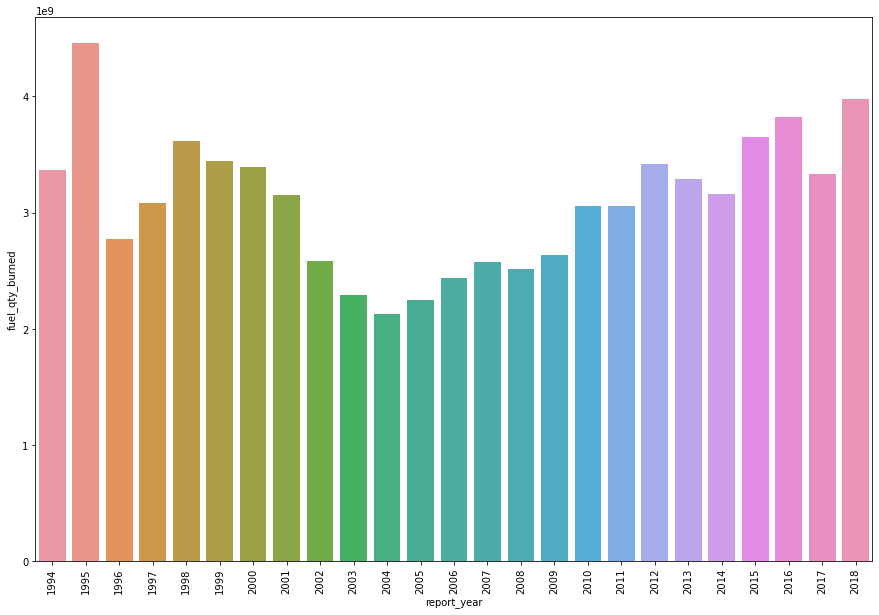

In [19]:
# In which Year more fuel Quantity is burned
report_year_fuel_qty_burned = df.groupby(['report_year'])['fuel_qty_burned'].sum().sort_values(ascending =True)
df_report_year_fuel_qty_burned = pd.DataFrame(report_year_fuel_qty_burned,columns=['fuel_qty_burned'])

# Plotting Bar graph. --> report_year v\s fuel_qty_burned
plt.figure(figsize=(15,10))
sns.barplot(data=df_report_year_fuel_qty_burned, x=df_report_year_fuel_qty_burned.index, y= 'fuel_qty_burned')
plt.xticks(rotation=90)
plt.show()

### So, in these plot what we have understood is  that in 1995 there was more fuel consumption  as compared to all years

In [20]:
# Lets Make the Box plot so That we can understand is there any outliers in the particular numerical variable.
def Boxplot(df,numerical_feature, color):
    sns.boxplot(df[numerical_feature],color = color)
    plt.show()

To color the boxplot give the color for this feature utility_id_ferc1:red


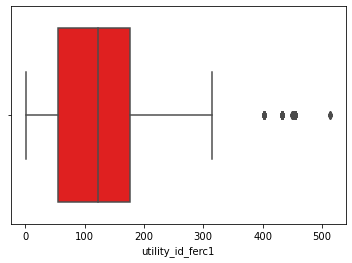

To color the boxplot give the color for this feature report_year:green


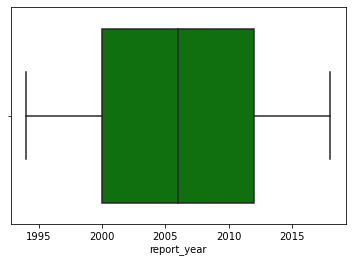

To color the boxplot give the color for this feature fuel_qty_burned:blue


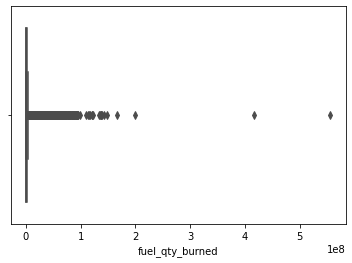

To color the boxplot give the color for this feature fuel_mmbtu_per_unit:brown


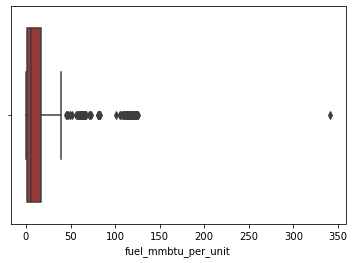

To color the boxplot give the color for this feature fuel_cost_per_unit_burned:yellow


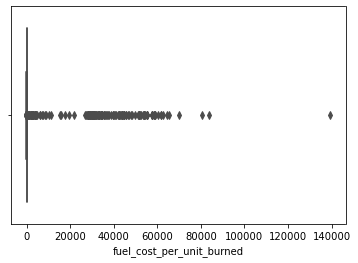

To color the boxplot give the color for this feature fuel_cost_per_unit_delivered:indigo


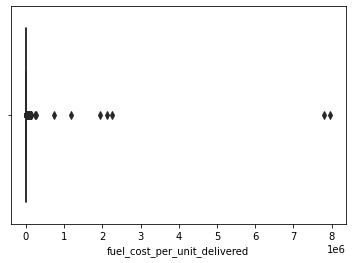

To color the boxplot give the color for this feature fuel_cost_per_mmbtu:violet


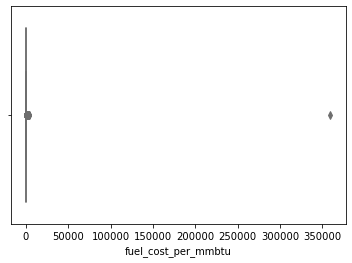

In [21]:
for column in df.columns:
    if df[column].dtype=='int64' or df[column].dtype=='float64':
        color = input(f"To color the boxplot give the color for this feature {column}:")
        Boxplot(df,column,color)

### This all box plots Graph is not Important because It doesnt Give any information.

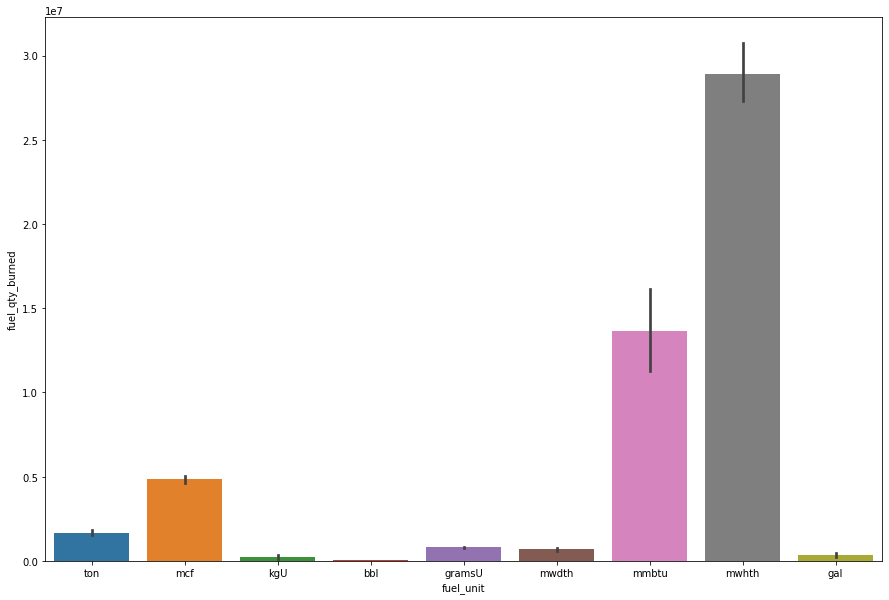

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data =df, x='fuel_unit', y='fuel_qty_burned')
plt.show()

#### 'mwhth' is only fuel unit which has burned most of the fuel quantity.

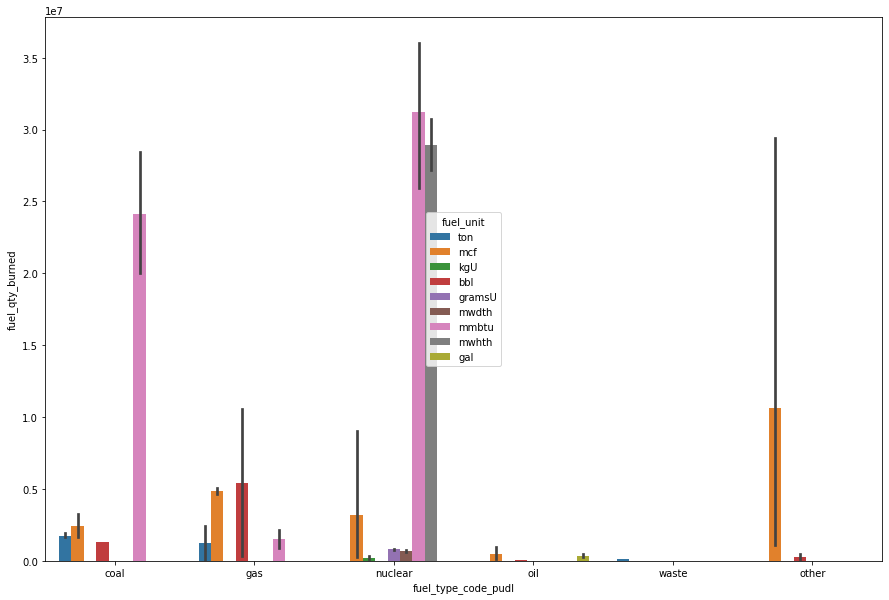

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(data =df, x="fuel_type_code_pudl", y="fuel_qty_burned",hue ='fuel_unit')
plt.show()

#### From this graph, Nuclear with fuel unit mmbtu burned the most fuel quantity.

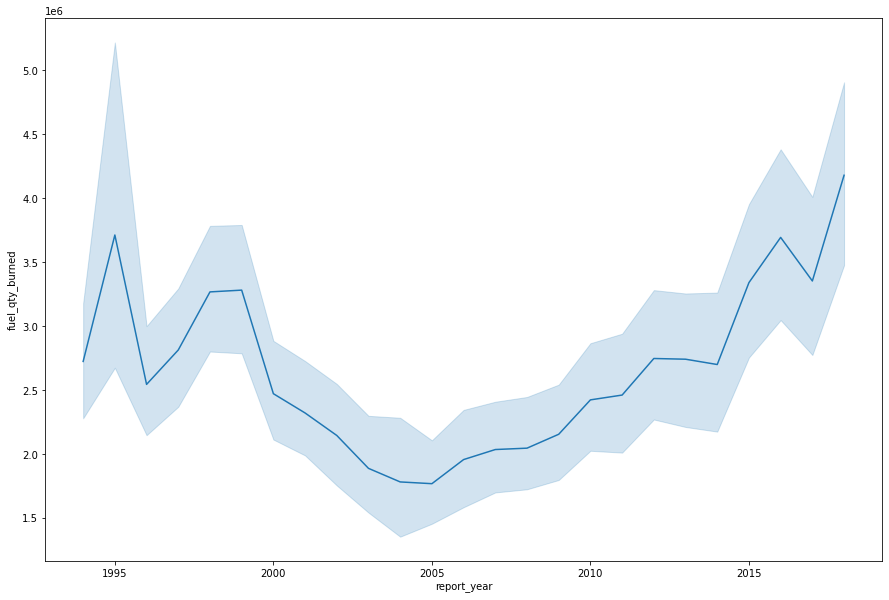

In [24]:
plt.figure(figsize=(15,10))
sns.lineplot(data =df, x='report_year',y='fuel_qty_burned')
plt.show()

#### This is how the fuel_quantity is burned throughout the year from 1994 to 2018. From this What I have understood is that in 1995 there was too much increment in the fuel quantity burned and then from 2000  it started decreasing then from 2001 - 2010  it was moving sideways and started increasing once again from 2010 uptill 2018. This trendline gives us this information that how the fuels were getting burned. We can also predict that because of more vehicles on the road which may increase the quantity of fuel to get burned.

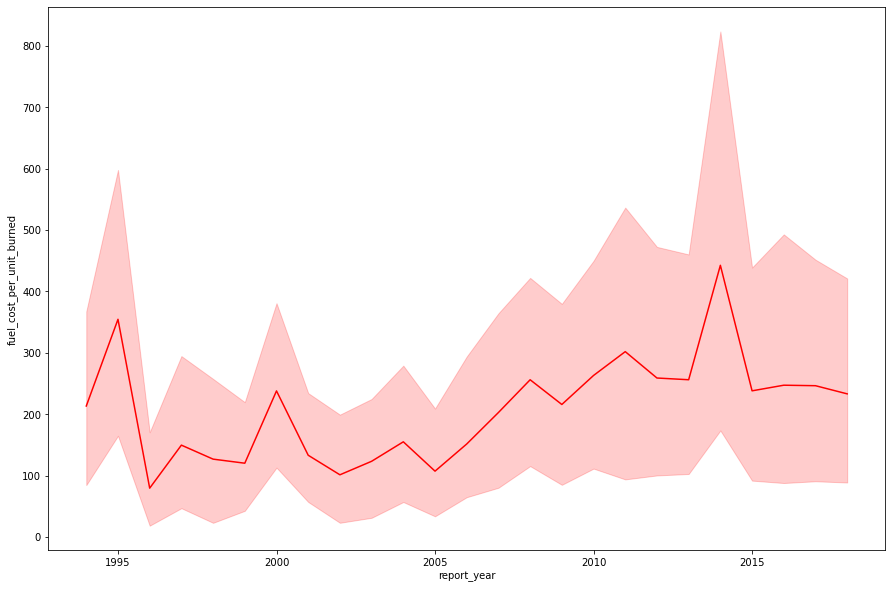

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(data =df, x='report_year',y='fuel_cost_per_unit_burned',color='red')
plt.show()

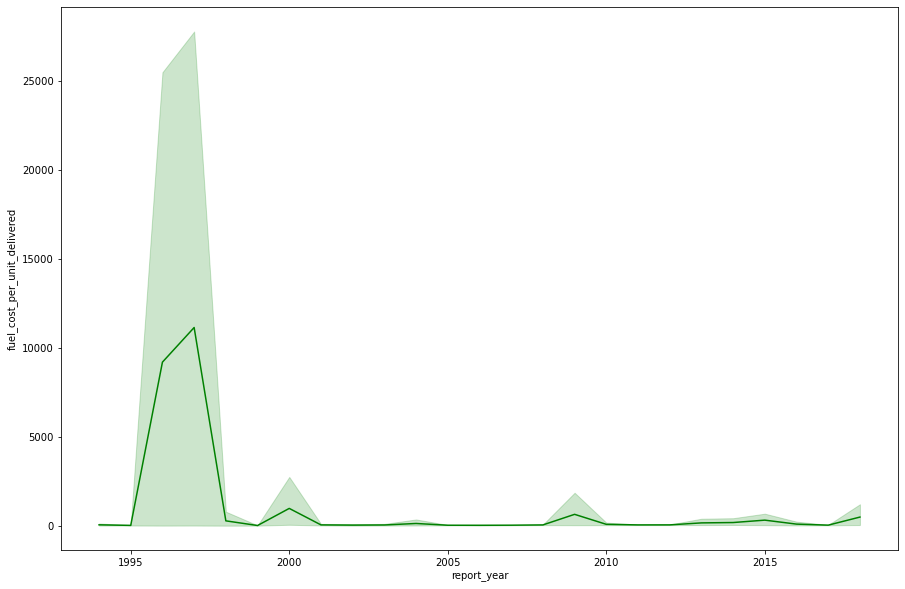

In [26]:
plt.figure(figsize=(15,10))
sns.lineplot(data =df, x='report_year',y='fuel_cost_per_unit_delivered', color='g')
plt.show()

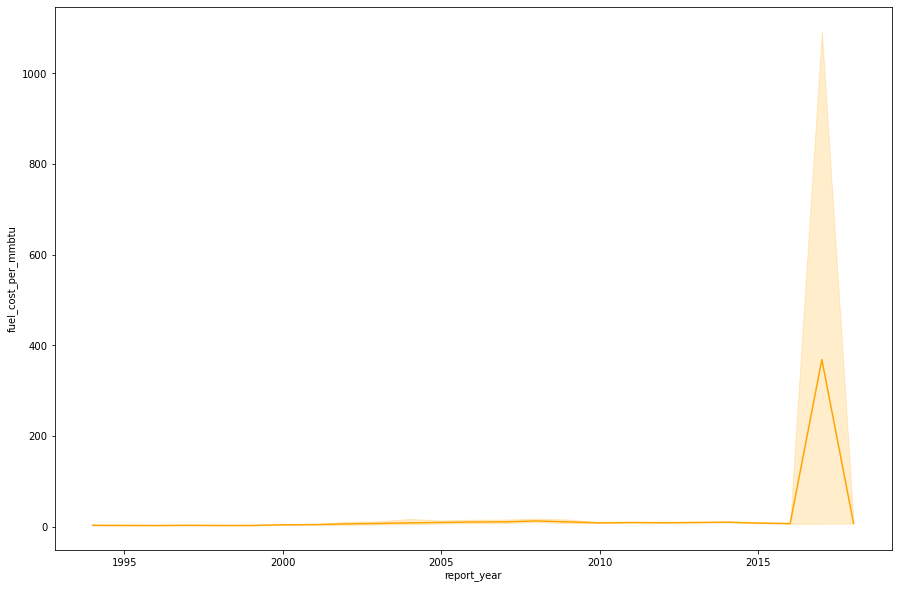

In [27]:
plt.figure(figsize=(15,10))
sns.lineplot(data =df, x='report_year',y='fuel_cost_per_mmbtu', color='orange')
plt.show()

### All This trendline doesnt give that much information. 

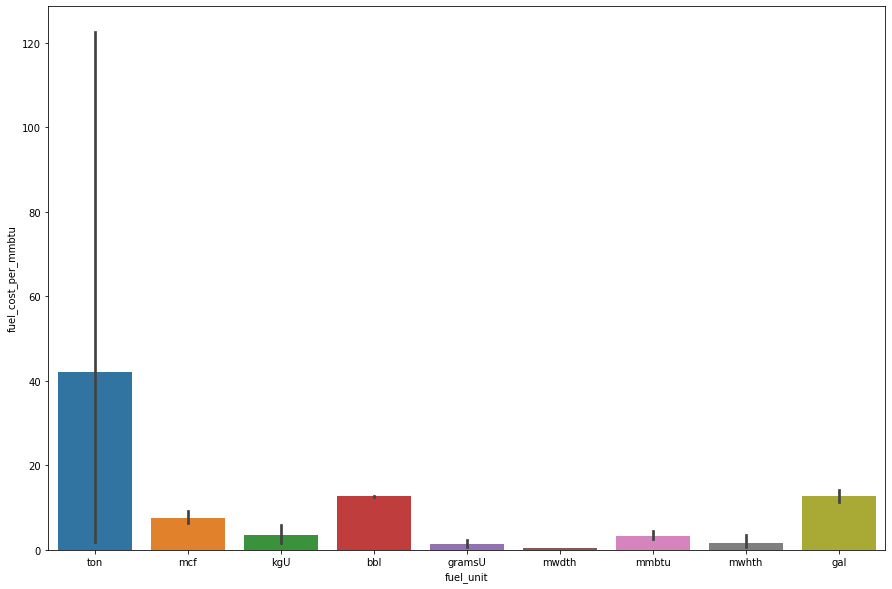

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(data =df, x='fuel_unit',y='fuel_cost_per_mmbtu')
plt.show()

In [29]:
## I have perform the random sampling technique. so we can do any Hypothesis.
df_sample =df.sample(n=25, random_state=40)
df_sample.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
25535,f1_fuel_2015_12_186_2_7,186,2015,north anna,nuclear,gramsU,1314009.0,0.113290,78.480,59.630,0.693
24889,f1_fuel_2014_12_80_0_9,80,2014,lacygne #1 (50%),oil,bbl,11848.0,5.764039,124.509,101.110,21.601
25767,f1_fuel_2015_12_145_1_5,145,2015,pawnee,gas,mcf,74021.0,1.075000,3.080,3.080,2.870
7546,f1_fuel_2000_12_45_1_5,45,2000,dan river,oil,bbl,2563.0,5.852994,34.666,36.464,5.924
14573,f1_fuel_2006_12_17_3_1,17,2006,brunswick,nuclear,mwdth,1516054.0,3.413000,36.663,0.000,0.448


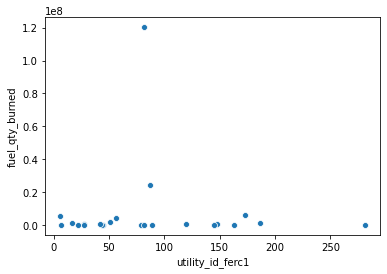

In [30]:
sns.scatterplot(data =df_sample , x='utility_id_ferc1',y='fuel_qty_burned')
plt.show()

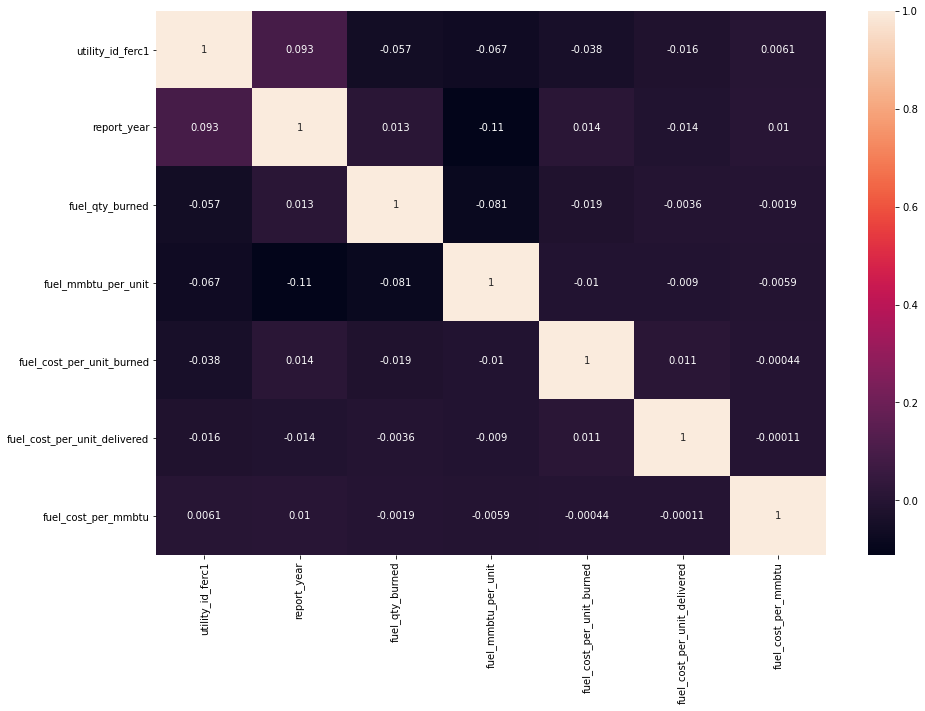

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

### there is Neither good positive correlation nor good negative correlation.

In [32]:
# Let see some KDE plot so that we can understand that how much area is covered in the distribution.

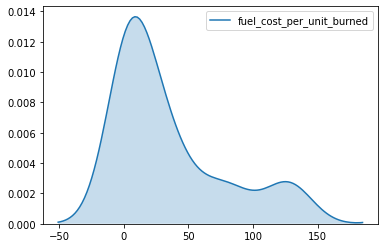

In [33]:
# Used the sample to determine the good skinny curve. When we sampled the data with batch size of 25.
sns.kdeplot(df_sample['fuel_cost_per_unit_burned'], shade=True)
plt.show()

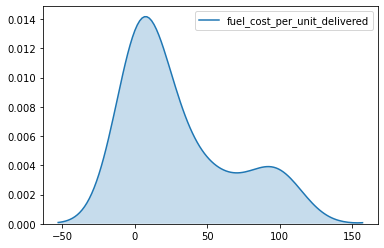

In [34]:
sns.kdeplot(df_sample['fuel_cost_per_unit_delivered'], shade =True)
plt.show()

In [35]:
# for this sampling of 25 every curve is showing almost bell curved but as the data increasing its no more Normally distributed
# So KDE plot also Cant give us Good Information.


## So , what did I understand from the EDA is that Fuel burned since 1994 to 2018 is not almost constant it was too volatile.

### Conclusion:
##### We should not burn more fuel to generate electricity.. Its good for the people because it is not much cost effective but it will harm the environnment. Because, everything is now being digital so that there is more usage of electricity world wide which will increase the burning of fuel quantity.

# Some Questions:

## 1. Which of the following fuel type code has the lowest average value for fuel_cost_per_unit_burned?

In [36]:
df.groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].mean().sort_values(ascending =True)

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

## 2. What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places?

In [37]:
df['fuel_mmbtu_per_unit'].describe()  #--> std - 10.60 , 75% -17.01

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

## 3. What is the skewness and kurtosis for the fuel quantity burned in two decimal places?

- skewness--> Skewness is a measure of the symmetry of a distribution. A distribution is skewed if the tail on one side of the mode is fatter or longer than on the other: it is asymmetrical.There are Two types of Skewness Right skewed and left skewed.

In [13]:
round(df['fuel_qty_burned'].skew(), 2)     #---skewness for the fuel quantity burned

15.85

**kurtosis --> Kurtosis is the statistical measure of degree of freedom at the peak of frequency distribution. There are different types of kurtosis-** 
1. Mesokurtic
2. Leptokurtic
3. Platykurtic

In [14]:
round(df['fuel_qty_burned'].kurt(),2)   #--> kurtosis for teb fuel quantity burned

651.37

## 4. What is the percentage of null values in the dataset w.r.t particular feature?

In [16]:
(df['fuel_unit'].isnull().sum()/len(df))* 100  #--> 0.61%  Null values are there in this feature.

0.609694136774718

## 5. What is the percentage change in the fuel_cost_per unit_burned w.r.t to fuel type called Coal from 1998 compared to 1994?

In [46]:
df_gb = df.groupby(['report_year','fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()

In [55]:
coal_cost_burned_in_1994=df_gb[1994][0]
print("Coal cost per unit burned in 1994:", coal_cost_burned_in_1994)

Coal cost per unit burned: 14984.572000000011


In [56]:
coal_cost_burned_in_1998=df_gb[1998][0]
print("Coal cost per unit burned in 1998:", coal_cost_burned_in_1998)

Coal cost per unit burned in 1998: 11902.597000000012


In [58]:
((coal_cost_burned_in_1994-coal_cost_burned_in_1998)/coal_cost_burned_in_1994)* 100
#--> there is decrease in fuel_qty_burned of 21% from 1994 to 1998 .

20.56765451826049

## 6. Which year has the highest average fuel cost per unit delivered?

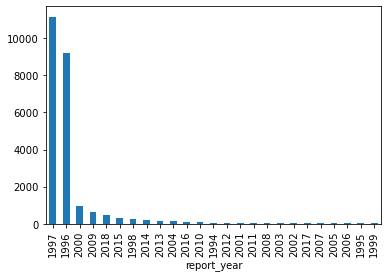

In [60]:
df.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()